In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_images, get_repeatability, measure_time
from keypoints import detect_keypoints, match_keypoints, match_shi_tomasi
from drawing import show_image, plot_keypoints, draw_matches

sns.set(font_scale=1.3)

In [2]:
images = read_images('./data')

### Keypoints example

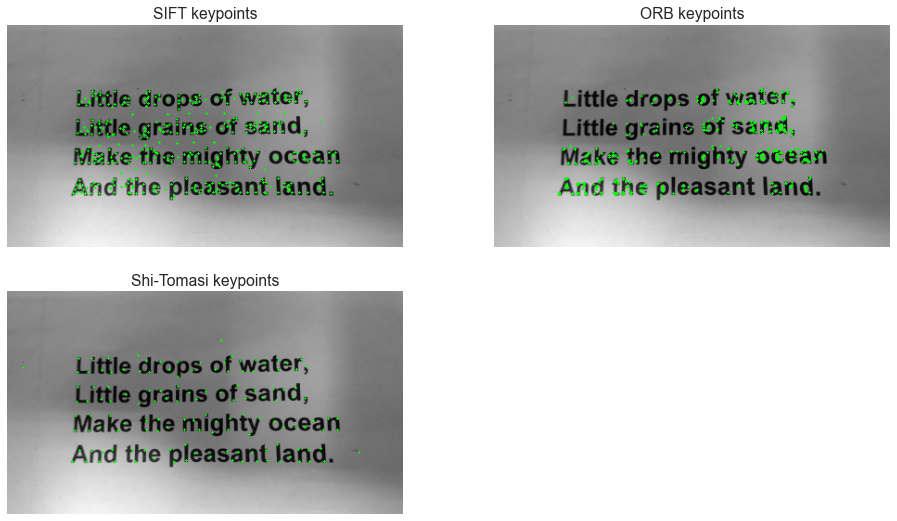

In [3]:
image = images[0].copy()

keypoints_sift, _ = detect_keypoints(image, method='sift')
keypoints_orb, _ = detect_keypoints(image, method='orb')
keypoints_shi, _ = detect_keypoints(image, method='shi-tomasi')

image_sift = plot_keypoints(image.copy(), keypoints_sift)
image_orb = plot_keypoints(image.copy(), keypoints_orb)
image_shi = plot_keypoints(image.copy(), keypoints_shi)

plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
plt.title('SIFT keypoints')
show_image(image_sift)

plt.subplot(2, 2, 2)
plt.title('ORB keypoints')
show_image(image_orb)

plt.subplot(2, 2, 3)
plt.title('Shi-Tomasi keypoints')
show_image(image_shi)

plt.show()

### SIFT match example

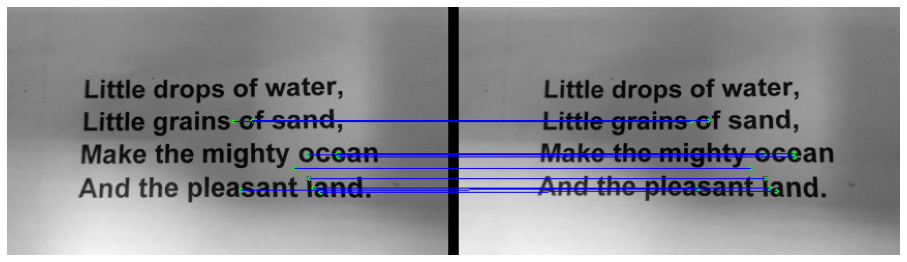

In [4]:
max_matches = 10

image0 = images[0].copy()
image1 = images[1].copy()
keypoints0, descriptors0 = detect_keypoints(image0, method='sift')
keypoints1, descriptors1 = detect_keypoints(image1, method='sift')
matches = match_keypoints(descriptors0, descriptors1)

draw_matches(image0, image1, keypoints0, keypoints1, matches[:max_matches], border=10)

### ORB match example

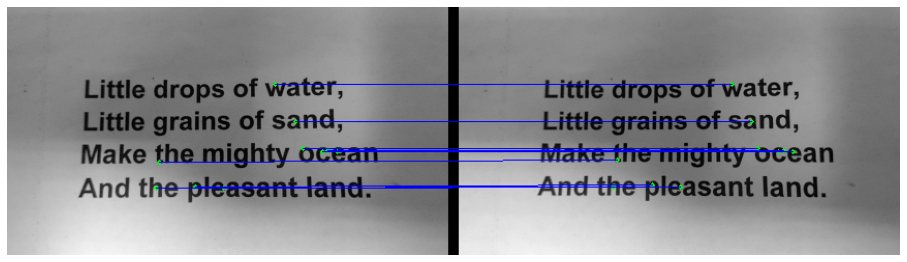

In [5]:
max_matches = 10

image0 = images[0].copy()
image1 = images[1].copy()
keypoints0, descriptors0 = detect_keypoints(image0, method='orb')
keypoints1, descriptors1 = detect_keypoints(image1, method='orb')
matches = match_keypoints(descriptors0, descriptors1)

draw_matches(image0, image1, keypoints0, keypoints1, matches[:max_matches], border=10)

### Shi-Tomasi match example

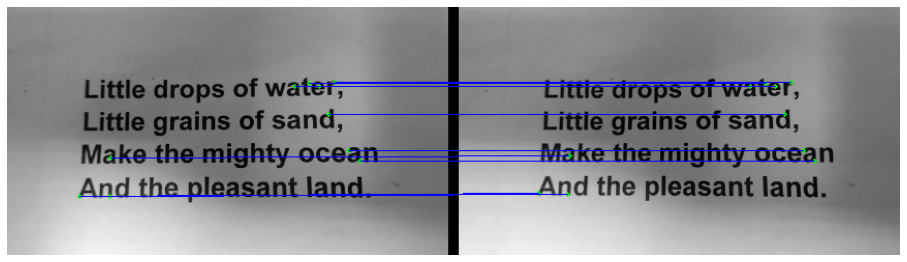

In [6]:
max_matches = 10

image0 = images[0].copy()
image1 = images[1].copy()

keypoints0, keypoints1, matches = match_shi_tomasi(image0, image1)
draw_matches(image0, image1, keypoints0, keypoints1, matches[:max_matches], border=10)

### Repeatability

In [7]:
sift_repeatability = get_repeatability(images, method='sift')
orb_repeatability = get_repeatability(images, method='orb')
shi_tomasi_repeatability = get_repeatability(images, method='shi-tomasi')

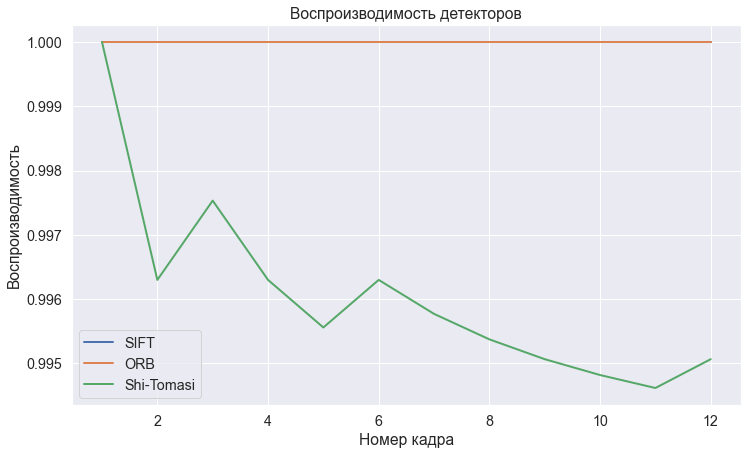

In [8]:
frames = np.arange(len(images)) + 1

plt.figure(figsize=(12, 7))
plt.title('Воспроизводимость детекторов')

plt.plot(frames, sift_repeatability, lw=2, label='SIFT')
plt.plot(frames, orb_repeatability, lw=2, label='ORB')
plt.plot(frames, shi_tomasi_repeatability, lw=2, label='Shi-Tomasi')

plt.xlabel('Номер кадра')
plt.ylabel('Воспроизводимость')
plt.legend()

plt.show()

#### Графики для SIFT и ORB полностью совпали

### Time

In [9]:
sift_time_per_point = measure_time(images, method='sift')
orb_time_per_point = measure_time(images, method='orb')
shi_tomasi_time_per_point = measure_time(images, method='shi-tomasi')

sift_points_per_second = int(1 / sift_time_per_point)
orb_points_per_second = int(1 / orb_time_per_point)
shi_tomasi_points_per_second = int(1 / shi_tomasi_time_per_point)

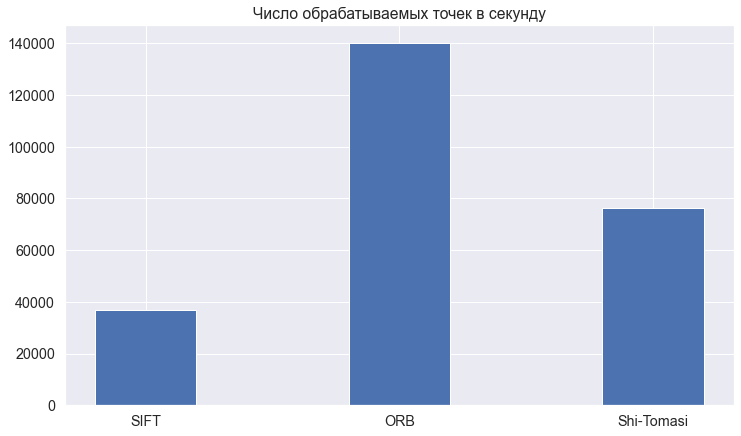

In [10]:
width = 0.2
labels = ['SIFT', 'ORB', 'Shi-Tomasi']
height = np.array([sift_points_per_second, orb_points_per_second, shi_tomasi_points_per_second])
x = np.linspace(0, 1, 3)

plt.figure(figsize=(12, 7))
plt.title('Число обрабатываемых точек в секунду')
plt.bar(x, height=height, width=width)
plt.xticks(x, labels=labels)
plt.show()